In [2]:
!wget http://bit.do/dosa-data -O data/dosa-data.zip

--2018-07-31 03:25:27--  http://bit.do/dosa-data
Resolving bit.do (bit.do)... 54.83.52.76
Connecting to bit.do (bit.do)|54.83.52.76|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/y0m0hfu3ttu98kc/dosa.zip [following]
--2018-07-31 03:25:27--  https://www.dropbox.com/s/y0m0hfu3ttu98kc/dosa.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/y0m0hfu3ttu98kc/dosa.zip [following]
--2018-07-31 03:25:27--  https://www.dropbox.com/s/raw/y0m0hfu3ttu98kc/dosa.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69679bc7519cf9f0e8d49abf4d.dl.dropboxusercontent.com/cd/0/inline/AMsGSdjDfO_tCzgzHS3fPPncjujesO5nUxXUWOI4Mfdj5geqJhbxcFCfpAHmgvCYu_lA0ybfn9SkEvdsjEMU3SwhXFn

In [3]:
!cd data && unzip dosa-data.zip 

Archive:  dosa-data.zip
  inflating: testy.npy               
  inflating: __MACOSX/._testy.npy    
  inflating: testx.npy               
  inflating: __MACOSX/._testx.npy    
  inflating: trainx.npy              
  inflating: __MACOSX/._trainx.npy   
  inflating: trainy.npy              
  inflating: __MACOSX/._trainy.npy   


### Load data

In [6]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import vis

Using TensorFlow backend.


In [5]:
train_X = np.load("data/trainx.npy")
train_y = np.load("data/trainy.npy")
test_X = np.load("data/testx.npy")
test_y = np.load("data/testy.npy")

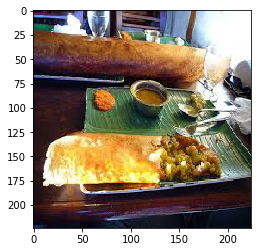

In [17]:
plt.imshow(train_X[1])

### Image Augmentation

In [8]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [18]:
image = train_X[1]

In [20]:
datagen = ImageDataGenerator(rotation_range=45,
                             rescale=1,
                             width_shift_range=0.2, 
                             height_shift_range=0.2)


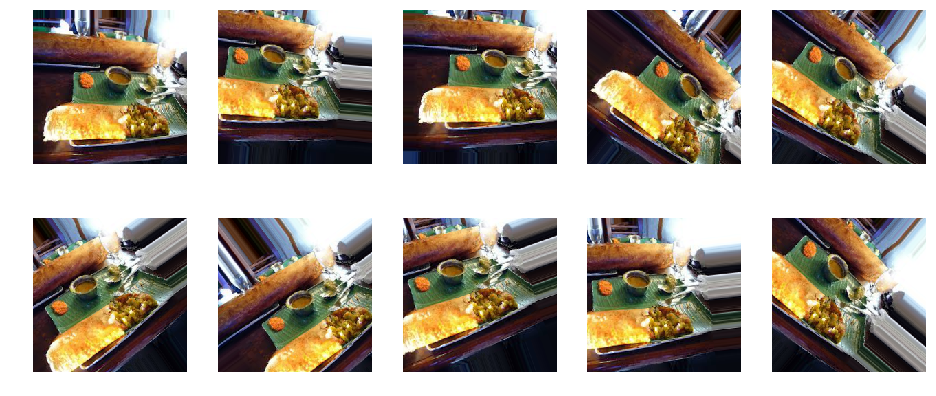

In [21]:
vis.show_single_image_gen(datagen, image, 10)

### Image Augmentation

In [24]:
data = ImageDataGenerator(
                          samplewise_center=True, # set input mean to 0 over the sample
                          samplewise_std_normalization=True,  # divide inputs by std of the sample
                          rotation_range=90,       # randomly rotate images in the range (degrees, 0 to 180)
                          width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
                          height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                          fill_mode='reflect',     # filling the area outside
                          zoom_range=0.4,          # random zoom
                          horizontal_flip=True,    # randomly flip images
                          vertical_flip=True)      # randomly flip images

In [70]:
train_generator = data.flow(x = train_X, 
                                           y=train_y,
                                           shuffle=True, 
                                           #batch_size=8, 
                                           #subset='training')
                           )

In [71]:
test_generator = data.flow(x = test_X, 
                                           y=test_y,
                                           shuffle=True, 
                                           #batch_size=8, 
                                           #subset='validation')
                          )

In [53]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [54]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation='sigmoid'))

In [55]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
__________

In [56]:
cnn.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [58]:
cnn_output =  cnn.fit_generator(train_generator, epochs=2,
                                validation_data=test_generator, verbose = 2)

Epoch 1/2
 - 9s - loss: 0.6409 - acc: 0.6763 - val_loss: 0.6359 - val_acc: 0.6769
Epoch 2/2
 - 8s - loss: 0.6229 - acc: 0.6706 - val_loss: 0.6386 - val_acc: 0.6769


In [59]:
cnn_metrics = cnn_output.history

In [60]:
cnn_metrics

{'val_loss': [0.6358998647102942, 0.6385522347230178],
 'val_acc': [0.676923076923077, 0.676923076923077],
 'loss': [0.6466414488278902, 0.6287052301260141],
 'acc': [0.6692307692307692, 0.675]}

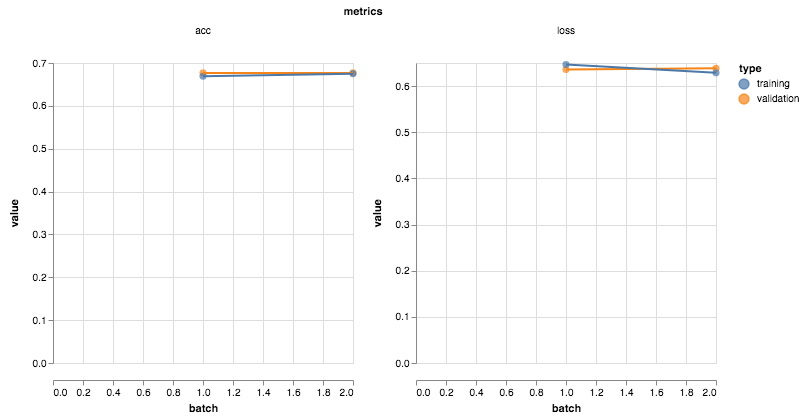

In [61]:
vis.metrics(cnn_metrics)

### Transfer Learning

In [63]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, GlobalAveragePooling2D

In [64]:
conv_base = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3), pooling="avg")

94658560/94653016 [==============================] - 1s 0us/step


In [65]:
for layer in conv_base.layers:
    layer.trainable = False

In [66]:
x = conv_base.output
x = Dense(512, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
x = Dense(128, activation='relu')(x) # let's add a fully-connected layer
x = Dropout(0.25)(x)
predictions = Dense(2, activation='softmax')(x)

# this is the model we will train
m = Model(inputs=conv_base.input, outputs=predictions)

In [68]:
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [69]:
m.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [73]:
train_generator = data.flow(x = train_X, 
                                           y=train_y,
                                           shuffle=True, 
                                           #batch_size=8, 
                                           #subset='training')
                           )

In [74]:
test_generator = data.flow(x = test_X, 
                                           y=test_y,
                                           shuffle=True, 
                                           #batch_size=8, 
                                           #subset='validation')
                          )

In [75]:
m_output =  m.fit_generator(train_generator, epochs=2, steps_per_epoch=230 // 8,
                            validation_data=test_generator, validation_steps=60 // 8,
                            verbose = 1)


Epoch 1/2
28/28 [==============================] - 196s 7s/step - loss: 0.6047 - acc: 0.6923 - val_loss: 0.7750 - val_acc: 0.6790
Epoch 2/2
28/28 [==============================] - 194s 7s/step - loss: 0.4871 - acc: 0.7702 - val_loss: 0.8137 - val_acc: 0.6667


In [76]:
m_metrics = m_output.history

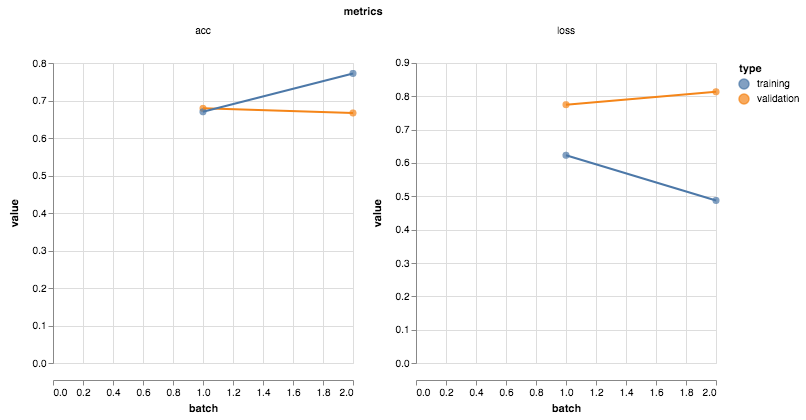

In [77]:
vis.metrics(m_metrics)

### Fine tuning

In [78]:
for layer in m.layers[:47]:
   layer.trainable = False
for layer in m.layers[47:]:
   layer.trainable = True

In [79]:
m.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [80]:
train_generator = data.flow(x = train_X, 
                                           y=train_y,
                                           shuffle=True, 
                                           #batch_size=8, 
                                           #subset='training')
                           )

In [81]:
test_generator = data.flow(x = test_X, 
                                           y=test_y,
                                           shuffle=True, 
                                           #batch_size=8, 
                                           #subset='validation')
                          )

In [ ]:
m_output_trainable =  m.fit_generator(train_generator, epochs=2, steps_per_epoch=230 // 8,
                            validation_data=test_generator, validation_steps=60 // 8,
                            verbose = 1)

Epoch 1/2
